# Prova Intermediária - Machine Learning

**Nome do aluno**: <font color='red'>Enricco Gemha</font>

Você deve submeter o trabalho via Blackboard. É de sua responsabilidade garantir que o arquivo correto foi enviado.

Se você precisou adicionar arquivos extras à essa prova, assegure-se de que você os está enviando também.

A prova é individual e com consulta. Faça o seu trabalho de maneira ética! Se você recebeu ajuda de sistemas de apoio inteligentes (por exemplo, ChatGPT, Bard, CoPilot, etc) DECLARE CLARAMENTE ONDE VOCÊ RECEBEU AJUDA para não configurar plágio (definido como "declarar como próprio o trabalho construido por outrem - neste caso um sistema computacional")

- [Contexto do problema](#Contexto-do-problema)

- [Análise exploratória](#Análise-exploratória)

- [Prova intermediária](#Prova-intermediária)


In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(42)

# Contexto do problema

Vamos trabalhar com um dataset de automóveis. As *features* são atributos de automóveis e o *target* é o consumo de combustível, em *mpg* (*miles-per-gallon*, ou milhas-por-galão de combustível).

A descrição abaixo é a documentação original do *dataset*:

```
1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

5. Number of Instances: 398

6. Number of Attributes: 9 including the class attribute

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

8. Missing Attribute Values:  horsepower has 6 missing values
```

Para melhor entender esse dataset, segue a explicação do significado de cada atributo:

- `mpg`: consumo do veículo em milhas-por-galão. Quanto maior esse atributo, mais econômico é o carro.
- `cylinders`: número de cilindros do motor
- `displacement`: volume combinado do espaço de trabalho dos cilindros no motor, dado em polegadas cúbicas
- `horsepower`: potência do motor, em CV (cavalo-vapor)
- `weight`: peso do veículo, em libras
- `acceleration`: aceleração do veículo, medido como o tempo em segundos para atingir 60 milhas-por-hora a partir do repouso (parado)
- `model year`: ano do modelo do carro
- `origin`: variável discreta nominal (ou seja: categórica) indicando a origem do fabricante do veículo.
    - 1: americano
    - 2: europeu
    - 3: asiático
- `car_name`: Nome do modelo



# Análise exploratória

## Lendo o dataset

In [2]:
df = pd.read_csv('auto_mpg.csv')


In [3]:
df.shape


(398, 9)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


<h3 style="color:red">Atenção</h3>

Parece que o dataset tem valores faltantes, lembre-se disso mais abaixo, na hora de processar os dados.

In [5]:
df['car_name'] = df['car_name'].astype('category')
df['origin'] = df['origin'] \
    .astype('category') \
    .cat \
    .rename_categories({1: 'America', 2: 'Europa', 3: 'Asia'})


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   year          398 non-null    int64   
 7   origin        398 non-null    category
 8   car_name      398 non-null    category
dtypes: category(2), float64(5), int64(2)
memory usage: 33.7 KB


In [7]:
df['origin'].value_counts()


origin
America    249
Asia        79
Europa      70
Name: count, dtype: int64

In [8]:
df['car_name'].value_counts()


car_name
ford pinto              6
ford maverick           5
amc matador             5
toyota corolla          5
chevrolet impala        4
                       ..
dodge st. regis         1
fiat 124 sport coupe    1
fiat 124 tc             1
fiat 124b               1
vw rabbit custom        1
Name: count, Length: 305, dtype: int64

<h3 style="color:red">Atenção</h3>

A coluna `car_name` é muito difícil de tratar com nosso conhecimento atual. Pode até ser que exista informação relevante no nome do carro para a previsão do consumo (e.g. carros da Toyota poderiam ser mais econômicos, hipotéticamente), mas não vamos lidar com processamento do texto aqui. Desta forma, vamos descartar essa coluna.

In [9]:
df = df.drop(columns=['car_name'])


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        398 non-null    float64 
 5   acceleration  398 non-null    float64 
 6   year          398 non-null    int64   
 7   origin        398 non-null    category
dtypes: category(1), float64(5), int64(2)
memory usage: 22.4 KB


In [11]:
def split_features_target(df):
    target_column = 'mpg'
    X = df.drop(columns=[target_column]).copy()
    y = df[target_column].copy()
    return X, y


In [12]:
X, y = split_features_target(df)


In [13]:
X.head()


,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130.0,3504.0,12.0,70,America
1,8,350.0,165.0,3693.0,11.5,70,America
2,8,318.0,150.0,3436.0,11.0,70,America
3,8,304.0,150.0,3433.0,12.0,70,America
4,8,302.0,140.0,3449.0,10.5,70,America


In [14]:
y.head()


0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

## Separando treino e teste antes da análise exploratória

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [16]:
X_train.shape, X_test.shape


((298, 7), (100, 7))

In [17]:
y_train.shape, y_test.shape


((298,), (100,))

## Estatísticas descritivas simples e visualizações

As estatísticas descritivas simples (contagens, médias, medianas, desvios, etc.) são a primeira verificação do dataset, para que tenhamos uma noção da natureza dos dados. Tendo esse entendimento inicial, teremos melhor capacidade de conceber boas visualizações dos dados para continuar a ampliar nosso entendimento da situação.

Estatísticas descritivas das variáveis contínuas
        cylinders  displacement  horsepower       weight  acceleration   
count  298.000000    298.000000  293.000000   298.000000    298.000000  \
mean     5.449664    192.817114  103.211604  2978.704698     15.657718   
std      1.677485    101.770675   36.860385   834.131101      2.771371   
min      3.000000     68.000000   46.000000  1613.000000      8.000000   
25%      4.000000    105.000000   76.000000  2227.000000     13.900000   
50%      4.000000    151.000000   92.000000  2880.000000     15.500000   
75%      6.000000    259.500000  122.000000  3608.000000     17.300000   
max      8.000000    455.000000  225.000000  5140.000000     24.800000   

             year         mpg  
count  298.000000  298.000000  
mean    76.077181   23.526846  
std      3.577532    7.908152  
min     70.000000    9.000000  
25%     73.000000   17.500000  
50%     76.000000   22.150000  
75%     79.000000   29.500000  
max     82.000000   46.60000

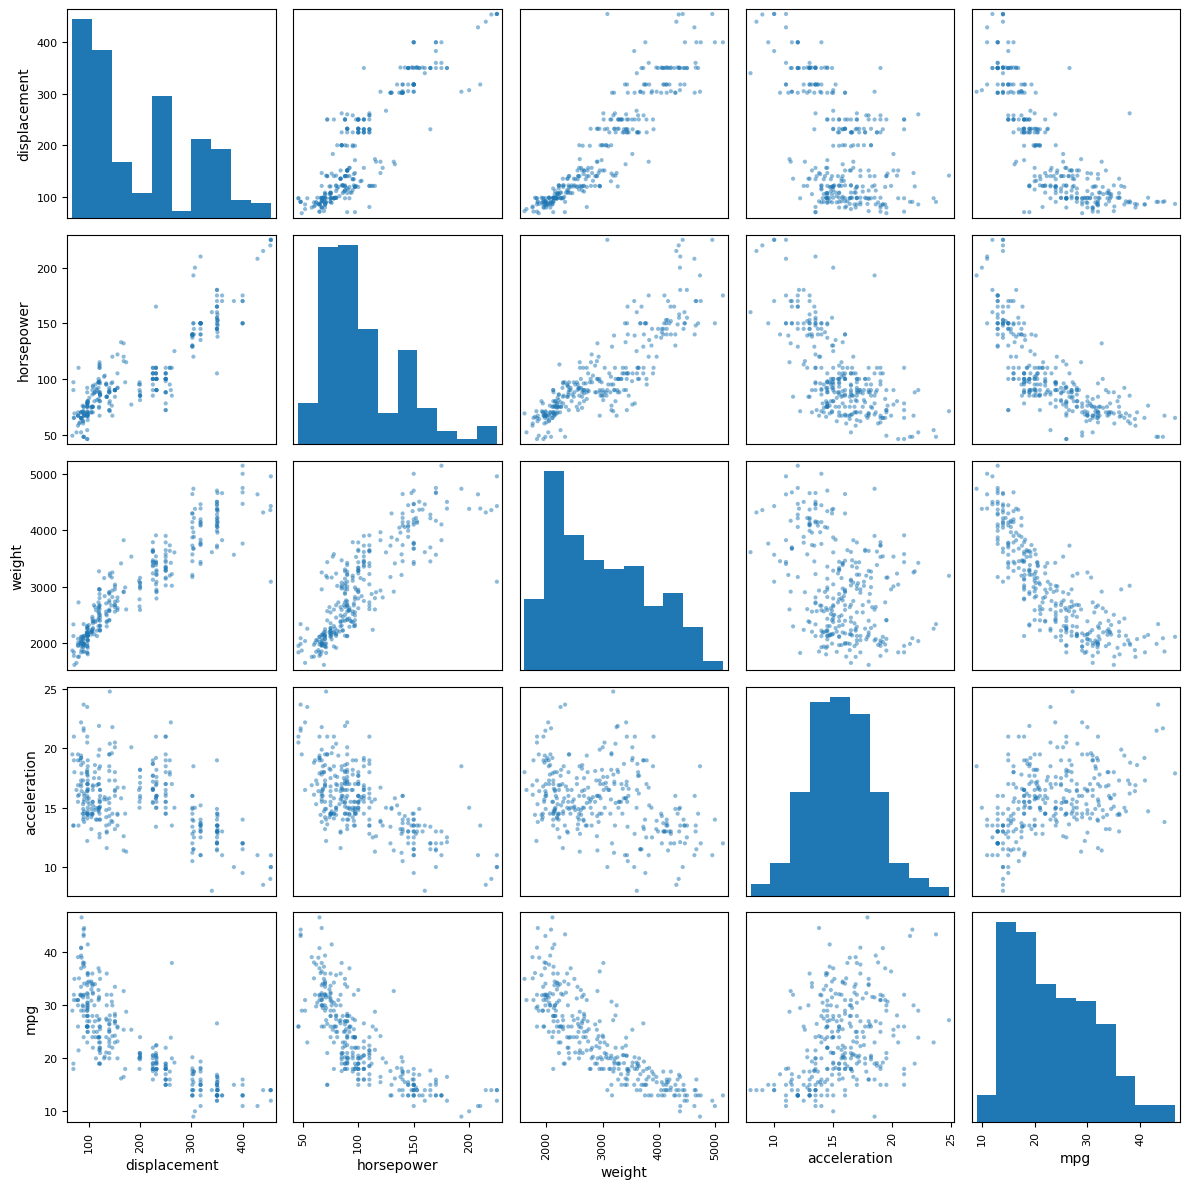

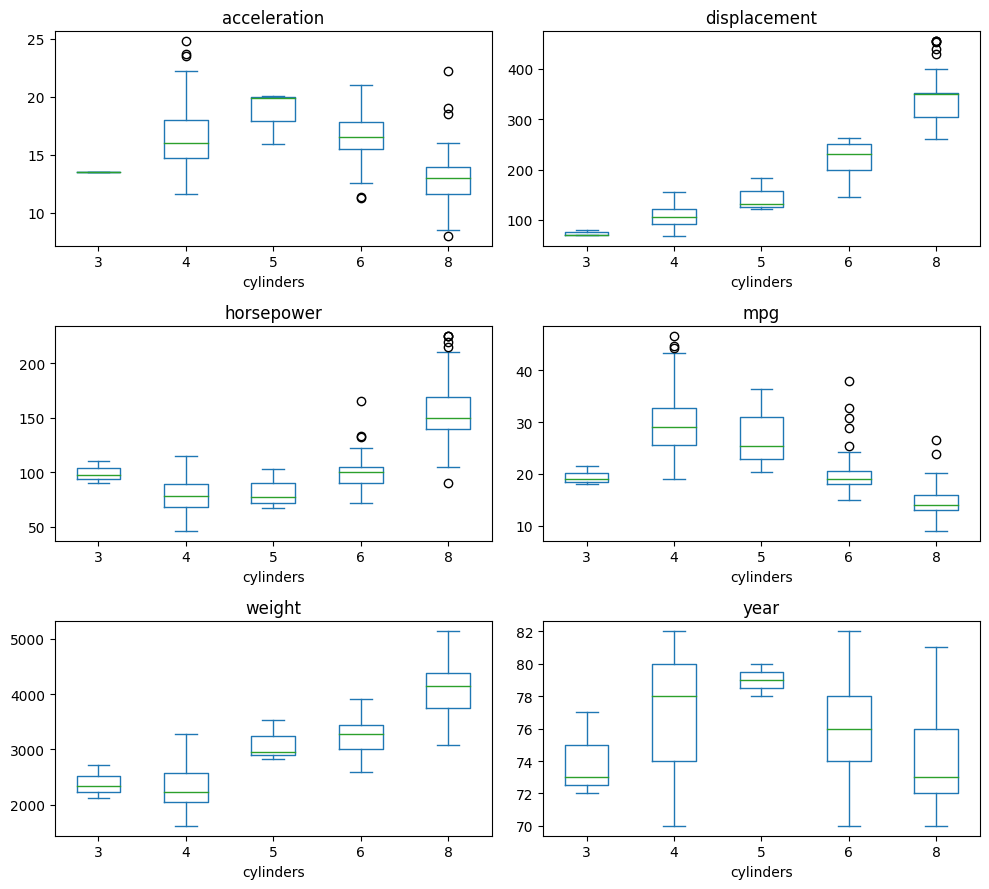

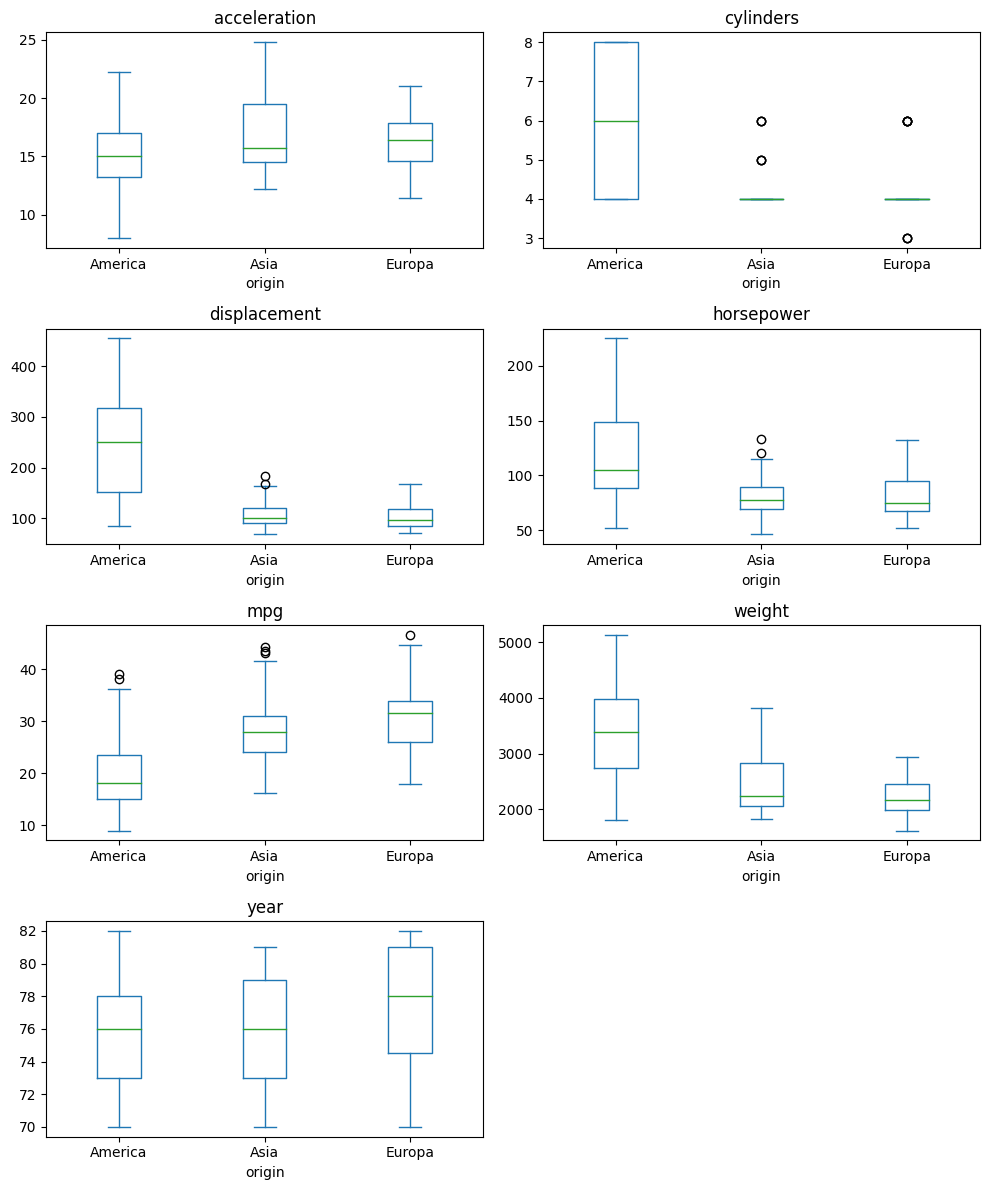

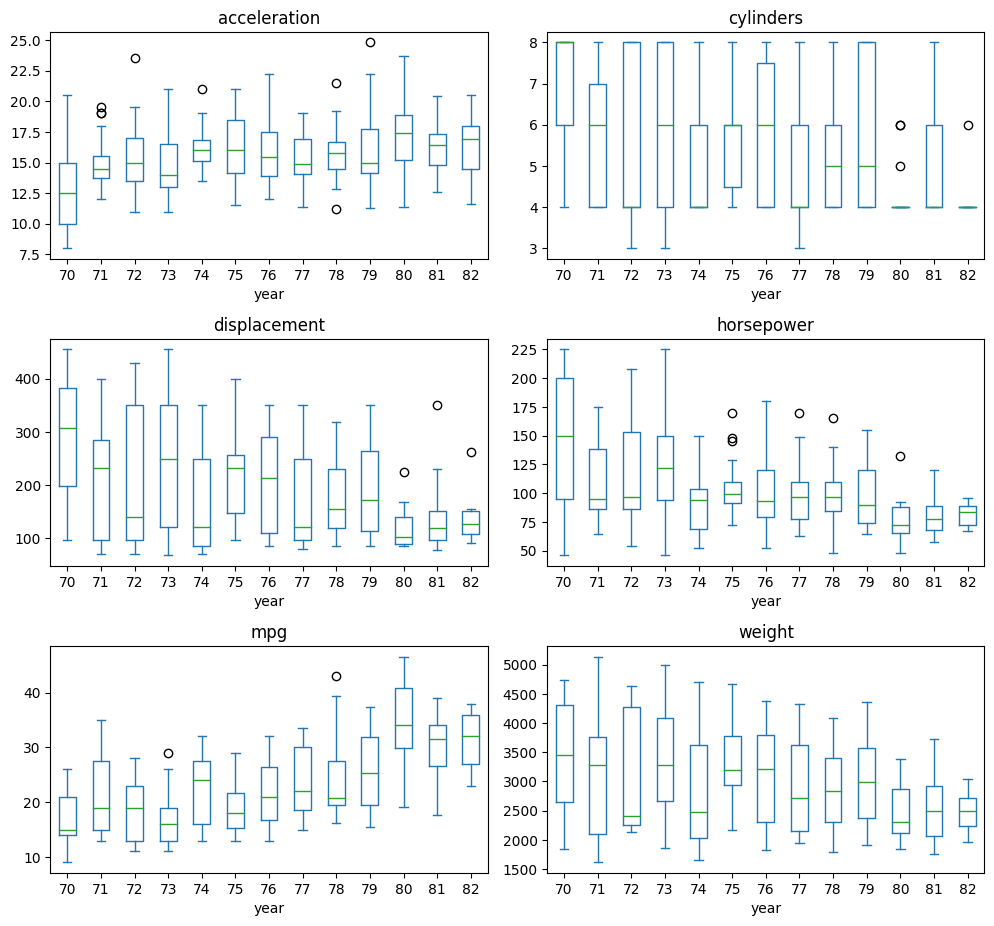

In [18]:
def visualize(df_train):
    print('Estatísticas descritivas das variáveis contínuas')
    print(df_train.describe(include=np.number))
    print()

    print('Estatísticas descritivas das variáveis categóricas')
    print(df_train.describe(include='category'))
    print()

    df_train_numericals = df_train.drop(
        columns=['origin', 'cylinders', 'year'])

    print('Correlações entre as variáveis numéricas')
    print(df_train_numericals.corr())
    print()

    print('Visualizações')

    pd.plotting.scatter_matrix(df_train_numericals, figsize=(12, 12))
    plt.tight_layout()
    plt.show()

    df_train \
        .drop(columns=['origin']) \
        .plot \
        .box(by='cylinders', layout=(3, 2), figsize=(10, 9), xlabel='cylinders')
    plt.tight_layout()
    plt.show()

    df_train \
        .plot \
        .box(by='origin', layout=(4, 2), figsize=(10, 12), xlabel='origin')
    plt.tight_layout()
    plt.show()

    df_train \
        .plot \
        .box(by='year', layout=(4, 2), figsize=(10, 12), xlabel='year')
    plt.tight_layout()
    plt.show()


df_train = X_train.copy()
df_train['mpg'] = y_train

visualize(df_train)


# Prova intermediária

Ao longo das questões seguintes você vai construir um projeto de regressão.

### Questão 1: Modelo linear simples


a) (1,0 pt) Processe os dados de treinamento de modo a prepará-los para o uso em um modelo de regressão linear. Não enriqueça o modelo com *feature engineering* ainda, apenas corrija valores faltantes e codifique as variáveis categóricas conforme necessário. Não é obrigatório o uso de `Pipeline` ou `ColumnTransformer` - esteja livre para usá-los ou não, conforme preferir.

**<font color='red'>Utilizei Copilot em todas as células desta questão</font>**

In [19]:
# obtem as linhas que possuem valores faltantes
sample_incomplete_rows = df_train[df_train.isnull().any(axis=1)]
sample_incomplete_rows

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg
336,4,140.0,NaN,2905.0,14.3,80,America,23.6
374,4,151.0,NaN,3035.0,20.5,82,America,23.0
32,4,98.0,NaN,2046.0,19.0,71,America,25.0
354,4,100.0,NaN,2320.0,15.8,81,Europa,34.5
330,4,85.0,NaN,1835.0,17.3,80,Europa,40.9


In [20]:
# obtem quantidade de linhas do df
len(df_train)

298

In [21]:
# dropa as linhas de `sample_incomplete_rows`
df_train = df_train.dropna(subset=['horsepower'])

# reindexa o df
df_train = df_train.reset_index(drop=True)
df_train.shape

(293, 8)

Por representarem somente 1.6% dos dados, os valores faltantes foram removidos.

In [22]:
# lista todas as colunas que possuem valores categoricos
df_train.select_dtypes(include='category').columns

Index(['origin'], dtype='object')

In [23]:
df_train['origin'].value_counts()

origin
America    183
Asia        59
Europa      51
Name: count, dtype: int64

Usaremos o *one-hot encoding* para codificar as variáveis categóricas.

In [24]:
# Separar apenas as variáveis categóricas (neste caso temos apenas uma).
df_train_cat = df_train[['origin']]

df_train_cat

,origin
0,America
1,Asia
2,America
3,America
4,America
...,...
288,Asia
289,America
290,Asia
291,Asia


In [25]:
# Cria o codificador.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories='auto')

# Aprende a codificação e já aplica a mesma ao dataset fornecido. Todo transformador no sklearn
# tem os métodos fit() para aprender a transformação, e transform() para aplicá-la.
# O método fit_transform() faz os dois atos em sequência.
df_train_cat_1hot = encoder.fit_transform(df_train_cat)

# Convertendo em matriz densa só para observar melhor:
print(df_train_cat_1hot.toarray()[:5])

# Transformando em dataframe novamente:
df_train_cat_1hot = pd.DataFrame(df_train_cat_1hot.toarray(), columns=encoder.categories_[0])

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [26]:
encoder.categories_

[array(['America', 'Asia', 'Europa'], dtype=object)]

In [27]:
# printa o tamanho de df_train_cat_1hot
df_train_cat_1hot.shape

(293, 3)

In [28]:
# insere o resultado de volta no df_train sem usar o concat
df_train = df_train.join(df_train_cat_1hot)

In [29]:
df_train.drop(columns=['origin'], inplace=True)
df_train

,cylinders,displacement,horsepower,weight,acceleration,year,mpg,America,Asia,Europa
0,4,98.0,66.0,1800.0,14.4,78,36.1,1.0,0.0,0.0
1,4,108.0,94.0,2379.0,16.5,73,22.0,0.0,1.0,0.0
2,6,199.0,97.0,2774.0,15.5,70,18.0,1.0,0.0,0.0
3,8,304.0,150.0,3672.0,11.5,72,17.0,1.0,0.0,0.0
4,6,250.0,105.0,3459.0,16.0,75,18.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
288,3,70.0,97.0,2330.0,13.5,72,19.0,0.0,1.0,0.0
289,8,350.0,180.0,4499.0,12.5,73,12.0,1.0,0.0,0.0
290,4,134.0,95.0,2515.0,14.8,78,21.1,0.0,1.0,0.0
291,4,89.0,62.0,2050.0,17.3,81,37.7,0.0,1.0,0.0


b) (1,0 pt) Analise o desempenho RMSE de um modelo de regressão linear usando validação cruzada com 10 partições. 

Dica: use a métrica `"neg_mean_squared_error"` no argumento `scoring` da função `cross_val_score`, e corrija adequadamente os escores obtidos.

In [30]:
# separa entre x (restante) e y (mpg) novamente
y_train = df_train['mpg']
X_train = df_train.drop(columns=['mpg'])
y_train.shape, X_train.shape

((293,), (293, 9))

In [31]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import mean_squared_error

baseline = LinearRegression()
lin_reg_ridge = Ridge(alpha=3.0)
dec_tree = DecisionTreeRegressor()
rand_forest = RandomForestRegressor()
models = [baseline, lin_reg_ridge, dec_tree, rand_forest]
m_names = ['baseline', 'Linear Regression - Ridge', 'Decision Tree', 'Random Forest']

In [32]:
scores = {}
for m_name, model in zip(m_names, models):
    print(f'-----------{m_name}-------------')
    model_scores = cross_val_score(
                        model,  # modelo
                        X_train,  # X_train
                        y_train,  # y_train
                        scoring='neg_mean_squared_error',  # metrica de interesse
                        cv=10,  # partições solicitadas
                        n_jobs=-1,  # Usa todos os cores
                    )
    model_rmse_scores = np.exp(np.sqrt(-model_scores)) # RMSE -> Erro médio relativo
    print('Scores:', model_rmse_scores.round(decimals=4))
    print('Mean:', model_rmse_scores.mean())
    print('Standard deviation:', model_rmse_scores.std())
    scores[m_name] = model_rmse_scores
    print('------------------------------------------')

-----------baseline-------------
Scores: [17.2851 38.7453  9.0466 59.2508 42.3456 68.411  13.26   48.5885 36.3577
 35.2183]
Mean: 36.850897048445766
Standard deviation: 18.39752302837707
------------------------------------------
-----------Linear Regression - Ridge-------------
Scores: [17.1066 38.4487  8.9133 60.2665 42.1803 69.3527 13.2691 48.9868 36.3609
 34.193 ]
Mean: 36.90778989228428
Standard deviation: 18.75264005629065
------------------------------------------
-----------Decision Tree-------------
Scores: [ 68.7072  32.0108  11.3498 158.212   77.1711  83.9765  19.1772  36.5982
  24.5815  35.9037]
Mean: 54.768797940096945
Standard deviation: 41.85327365378887
------------------------------------------
-----------Random Forest-------------
Scores: [ 9.6723 14.2313  6.331  32.8452 40.1791 43.4412 10.019  30.7572 11.6747
 10.6883]
Mean: 20.98392279784132
Standard deviation: 13.454140812506258
------------------------------------------


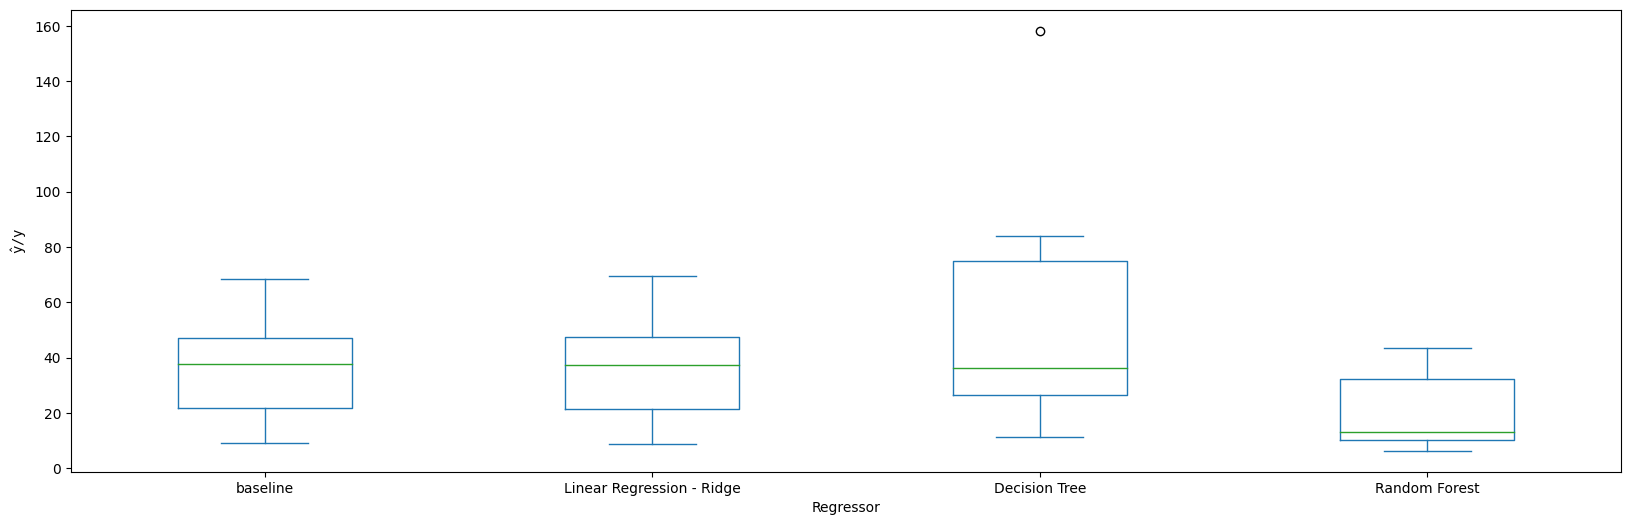

In [33]:
pd.DataFrame(scores).plot.box(
    xlabel='Regressor',
    ylabel=r'$\mathtt{\hat y / y}$',
    figsize=(20, 6),
);

Podemos perceber que o modelo Random Forest apresenta um desempenho melhor, sem feature engineering.

**Partes do código acima foram extraídas da aula 2 e outra parte do resumo enviado pelo aluno João Valentim no grupo de WhatsApp da turma.**

### Questão 2: Modelo linear com *feature engineering*


a) (1,0 pt) Refaça o processamento da questão 1, item a, mas agora incorpore os seguintes enriquecimentos de dados: 

- Features polinomiais de grau 2 (`PolynomialFeatures` no scikit-learn)
- Substitua a coluna `year` por uma coluna categórica chamada `status` (que deverá ser adequadamente representada para o modelo linear) com os seguintes valores:
    - "antes" se `year` menor ou igual ao ano de 1973
    - "entre" se `year` maior que o ano de 1973 e menor ou igual ao ano de 1979
    - "depois" se `year` maior que o ano de 1979
    
    Estes anos correspondem às crises do petróleo na década de 1970 (https://pt.wikipedia.org/wiki/Crises_do_petr%C3%B3leo)

Utilizei copilot nas celulas abaixo

In [34]:
X_train_feat_eng = X_train.copy()
y_train_feat_eng = y_train.copy()

X_train_feat_eng['status'] = X_train_feat_eng['year'].apply(lambda x: 'antes' if x <= 73 else 'entre' if x <= 79 else 'depois')
X_train_feat_eng.drop(columns=['year'], inplace=True)

X_train_feat_eng['status'].value_counts()

status
entre     147
antes      85
depois     61
Name: count, dtype: int64

In [35]:
# realiza one hot encoding de X_train_feat_eng
encoder = OneHotEncoder(categories='auto')
df_train_cat_1hot = encoder.fit_transform(X_train_feat_eng[['status']])
df_train_cat_1hot = pd.DataFrame(df_train_cat_1hot.toarray(), columns=encoder.categories_[0])

# insere o resultado de volta no X_train_feat_eng sem usar o concat
X_train_feat_eng = X_train_feat_eng.join(df_train_cat_1hot)
X_train_feat_eng.drop(columns=['status'], inplace=True)
X_train_feat_eng

,cylinders,displacement,horsepower,weight,acceleration,America,Asia,Europa,antes,depois,entre
0,4,98.0,66.0,1800.0,14.4,1.0,0.0,0.0,0.0,0.0,1.0
1,4,108.0,94.0,2379.0,16.5,0.0,1.0,0.0,1.0,0.0,0.0
2,6,199.0,97.0,2774.0,15.5,1.0,0.0,0.0,1.0,0.0,0.0
3,8,304.0,150.0,3672.0,11.5,1.0,0.0,0.0,1.0,0.0,0.0
4,6,250.0,105.0,3459.0,16.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
288,3,70.0,97.0,2330.0,13.5,0.0,1.0,0.0,1.0,0.0,0.0
289,8,350.0,180.0,4499.0,12.5,1.0,0.0,0.0,1.0,0.0,0.0
290,4,134.0,95.0,2515.0,14.8,0.0,1.0,0.0,0.0,0.0,1.0
291,4,89.0,62.0,2050.0,17.3,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_feat_eng)

# insere o resultado de volta no X_train_feat_eng sem usar o concat
X_train_feat_eng = pd.DataFrame(X_train_poly, columns=poly_features.get_feature_names(X_train_feat_eng.columns))
X_train_feat_eng

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names'

b) (1,0 pt) Assim como na questão 1, item b, analise o desempenho RMSE de um modelo de regressão linear usando validação cruzada com 10 partições. 

Dica: use a métrica `"neg_mean_squared_error"` no argumento `scoring` da função `cross_val_score`, e corrija adequadamente os escores obtidos.

In [37]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import mean_squared_error

baseline = LinearRegression()
lin_reg_ridge = Ridge(alpha=3.0)
dec_tree = DecisionTreeRegressor()
rand_forest = RandomForestRegressor()
models = [baseline, lin_reg_ridge, dec_tree, rand_forest]
m_names = ['baseline', 'Linear Regression - Ridge', 'Decision Tree', 'Random Forest']

In [38]:
scores = {}
for m_name, model in zip(m_names, models):
    print(f'-----------{m_name}-------------')
    model_scores = cross_val_score(
                        model,  # modelo
                        X_train_feat_eng,  # X_train
                        y_train_feat_eng,  # y_train
                        scoring='neg_mean_squared_error',  # metrica de interesse
                        cv=10,  # partições solicitadas
                        n_jobs=-1,  # Usa todos os cores
                    )
    model_rmse_scores = np.exp(np.sqrt(-model_scores)) # RMSE -> Erro médio relativo
    print('Scores:', model_rmse_scores.round(decimals=4))
    print('Mean:', model_rmse_scores.mean())
    print('Standard deviation:', model_rmse_scores.std())
    scores[m_name] = model_rmse_scores
    print('------------------------------------------')

-----------baseline-------------
Scores: [23.2706 22.6025 13.7826 32.6091 63.5387 63.0646 12.4789 45.9305 32.3157
 20.9626]
Mean: 33.05557543416968
Standard deviation: 17.726737626592552
------------------------------------------
-----------Linear Regression - Ridge-------------
Scores: [23.0101 23.4201 13.3383 34.7878 62.5329 63.3687 12.3886 45.5896 30.3696
 21.6169]
Mean: 33.04226215632402
Standard deviation: 17.59432342580571
------------------------------------------
-----------Decision Tree-------------
Scores: [ 36.5339  39.7485  64.7809 848.3974 125.8208 132.5832  44.4543  68.3025
  35.9348  40.4285]
Mean: 143.69848395002492
Standard deviation: 237.35486149201745
------------------------------------------
-----------Random Forest-------------
Scores: [23.6253 30.1934 12.3849 36.573  74.7615 61.2797 14.7927 35.3494 13.4136
 10.2846]
Mean: 31.265807280869232
Standard deviation: 20.697447103173108
------------------------------------------


### Questão 3: Escolha de modelo e análise final

a) (1,0 pt) Compare os dois modelos investigados nas questões anteriores. Existe evidência de que o modelo mais complexo é melhor que o modelo simples?

b) (1,0 pt) Retreine o modelo escolhido (se não houver evidencia de superioridade de um modelo sobre o outro, escolha o que você quiser) no conjunto de treinamento completo e meça o desempenho final no conjunto de teste. (O modelo continua sendo uma regressão linear, o que muda é o uso do conjunto de treinamento original ou o com *feature engineering*)

c) (1,0 pt) Visualize o histograma dos resíduos (diferença entre os valores preditos e valores reais) obtidos no conjunto de teste. Este modelo tem alguma tendência de errar para cima ou para baixo?

### Questão 4: Parte conceitual

a) (1,0 pt) Perguntei ao "ChatGPT" o seguinte: "No contexto de machine learning, explique com suas palavras e em menos de 100 palavras os conceitos de precision e recall.". A resposta foi:

"Precision e recall são métricas de avaliação usadas em machine learning para medir o desempenho de modelos de classificação. Precision mede a proporção de verdadeiros positivos em relação ao total de exemplos classificados como positivos, enfocando a precisão das predições positivas. Recall mede a proporção de verdadeiros positivos em relação ao total de exemplos verdadeiramente positivos, enfocando a capacidade do modelo de identificar corretamente todos os casos positivos. Em resumo, precision mede a precisão das predições positivas, enquanto recall mede a capacidade de um modelo encontrar todos os casos positivos. Ambas as métricas são importantes e podem ser ajustadas para atender às necessidades específicas do problema."

Construa um exemplo do seu cotidiano como aluno do Insper em que o trade-off precision versus recall poderia ser demonstrado. Você não deve incluir exemplos de projetos ou aplicativos de machine learning, ou provas academicas em geral.

Resposta: Um exemplo disso é o momento em que tenho que decidir o que comer no almoço, em que tenho de escolher entre à la carte do P2 ou self-service do P1. Se eu escolher o self-service, tenho a certeza de que a comida será boa, mas eu não sei se vai ter o que eu quero comer. Se eu escolher o à la carte, eu tenho a certeza de que vai ter o que eu quero comer, mas eu não sei se a comida vai ser boa. Nesse caso, o self-service tem uma precision alta, mas uma recall baixa, enquanto o à la carte tem uma precision baixa, porém uma recall alta.

**esta célula contém parte do conteúdo gerado pelo Copilot**

b) (1,0 pt) Explique para o seu professor de matemática do colegial o que é o algoritmo *gradient descent* e o que acontece quando usamos este algoritmo com taxa de aprendizado muito grande.

Resposta: 

O algoritmo *gradient descent* deseja encontrar o valor mínimo de uma função (geralmente, de custo), ou seja, o valor de $x$ que minimiza $f(x)$. Para alcançar isso atualizamos, a cada iteração, os parâmetros de um modelo, com base no gradiente da função de custo (um vetor que aponta na direção da maior taxa de aumento da função) multiplicado pela taxa de aprendizado. Repetimos esse processo até chegar em uma condição estabelecida como suficiente (*threshold*).$^1$

A taxa de aprendizado determina o quão grandes serão os saltos que o modelo dará, ou seja, quanto menor essa taxa, mais demorado será para alcançar o ponto mais baixo. Porém, caso a taxa seja muito grande, o modelo pode ultrapassar muito do ponto mais baixo e não conseguir chegar no ponto mais baixo, mas sim em algo próximo a isso.[$^2$](https://kantajitshaw.medium.com/eli5-gradient-descent-and-backpropagation-7bc202c8a549)

Quando utilizamos este algoritmo com uma taxa de aprendizado muito grande, o modelo pode não conseguir chegar no ponto mais baixo, se tivermos muita sorte em algo próximo a isso, ou pode não conseguir chegar nem perto do ponto mais baixo, se tivermos azar.

*Fontes:*
  - <font color='green'>(1) ChatGPT -> célula abaixo</font>
  - [(2) Eli5: Gradient Descent](https://kantajitshaw.medium.com/eli5-gradient-descent-and-backpropagation-7bc202c8a549) 

<font color='green'>
Prompt #1: me ajude a explicar o algoritmo gradient descent de um ponto de vista matemático do ensino médio.

Resposta: Claro! Vou explicar o algoritmo Gradient Descent (Descida do Gradiente) de um ponto de vista matemático que seja acessível para quem está no ensino médio.

O Gradient Descent é um algoritmo utilizado em aprendizado de máquina e otimização para encontrar o mínimo (ou máximo) de uma função. Ele funciona da seguinte forma:

1. **Função de Custo:** Primeiro, você tem uma função matemática que deseja minimizar. Chamaremos essa função de "Custo" ou "Erro". Em problemas de aprendizado de máquina, essa função é geralmente usada para medir o quão longe estamos dos resultados desejados. Vamos chamá-la de J(θ), onde θ representa os parâmetros que queremos ajustar.

2. **Inicialização:** Inicializamos um valor para θ. Isso pode ser feito aleatoriamente ou com algum valor inicial.

3. **Iteração:** Agora, começamos a iterar para encontrar o mínimo da função de custo. A ideia principal é ajustar os valores de θ de maneira iterativa para reduzir o valor de J(θ).

4. **Gradiente:** Em cada iteração, calculamos o gradiente da função de custo em relação a θ. O gradiente é um vetor que aponta na direção do aumento mais rápido da função de custo e sua magnitude representa a taxa de aumento. Representamos o gradiente como ∇J(θ).

5. **Atualização de θ:** Agora, atualizamos θ usando o gradiente calculado. A fórmula de atualização é a seguinte:
   
   θ = θ - α * ∇J(θ)

   Onde:
   - θ é o vetor de parâmetros que estamos ajustando.
   - α é a taxa de aprendizado (um valor pequeno que controla o tamanho dos passos que damos em direção ao mínimo).
   - ∇J(θ) é o gradiente da função de custo.

6. **Repetição:** Repetimos o passo 4 e 5 até que uma condição de parada seja atingida. Isso pode ser um número fixo de iterações ou quando o valor de J(θ) se torna suficientemente pequeno.

O processo de Gradient Descent funciona ajustando gradualmente os parâmetros θ na direção que reduz o valor da função de custo J(θ). Isso nos leva a encontrar os valores de θ que minimizam a função de custo, o que, em problemas de aprendizado de máquina, significa que nossos modelos se ajustarão melhor aos dados de treinamento.

É importante notar que o sucesso do Gradient Descent depende da escolha adequada da taxa de aprendizado (α) e da função de custo. Uma taxa de aprendizado muito pequena pode tornar o processo lento, enquanto uma taxa de aprendizado muito grande pode fazer com que o algoritmo não convirja para o mínimo global da função de custo. Portanto, ajustar a taxa de aprendizado é uma parte importante do uso eficaz do Gradient Descent.

Prompt #2: sumarize o prompt anterior

Resposta: O algoritmo Gradient Descent é uma técnica de otimização usada em aprendizado de máquina para encontrar o mínimo de uma função de custo. Ele funciona ajustando iterativamente os parâmetros de um modelo na direção que reduz o valor da função de custo. Isso é feito calculando o gradiente da função de custo e atualizando os parâmetros com base nesse gradiente, multiplicado pela taxa de aprendizado. O processo é repetido até que uma condição de parada seja alcançada. A taxa de aprendizado e a função de custo são fatores importantes a serem considerados ao usar o Gradient Descent.
</font>

c) (1,0 pt) Construa um exemplo concreto de como o machine learning pode ajudar a melhorar a qualidade de vida da população de rua em São Paulo. O exemplo deve ser específico de machine learning, e não de inteligência artificial no sentido mais amplo.

Resposta: Um dos grandes desafios para ajudar a reduzir o número de pessoas em situação de rua é que nem todos estão agrupados em um mesmo local, fazendo com que seja difícil centralizar um aparelho público para atender todas essas pessoas. Por isso, poderia-se utilizar a infraestrutura das câmeras de vigilância (tanto públicas quanto em parceria com estabelecimentos comerciais e prédios que possuem camêras externas) e de controle de tráfego de veículos (como as que estão sendo implantadas para modernização dos semáforos em São Paulo) para identificar pessoas em situação de rua. Isso se daria através de um algoritmo de machine learning que identificaria características comuns em pessoas em situação de rua e enviaria uma notificação para a prefeitura, que poderia enviar uma equipe para ajudar essas pessoas. Para isso seria necessário também dispor de uma equipe especializada em *Computer Vision*, que desenvolva um algoritmo para identificar a presença de certas características, como tempo de permanência da pessoa naquele lugar, presença de cobertor (algo comum na população em situação de rua), e assim por diante. Com base nesses parâmetros, o modelo deve julgar se tal pessoa pode estar em situação de rua, conforme treinamento realizado previamente, com amostras rotuladas. Neste caso, é preferível que o modelo tenha uma recall alta, para que não deixemos ninguém de fora. Também vale ressaltar que deveremos ter cuidado ao atribuir características a pessoas em situação de rua, para que não haja discriminação.

**Aceitei algumas sugestões pontuais do Copilot, mas o shape da solução foi ideia original minha** 